## Importation des packages 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
import statsmodels.formula.api as smf
import statsmodels.api as sm
from pathlib import Path

## Importation des données

In [2]:
df = pd.DataFrame(pd.read_csv("notes.csv"))

In [3]:
df

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0          True    171.81       104.86        104.95        4.52       2.89   
1          True    171.67       103.74        103.70        4.01       2.87   
2          True    171.83       103.76        103.76        4.40       2.88   
3          True    171.80       103.78        103.65        3.73       3.12   
4          True    172.05       103.70        103.75        5.04       2.27   
..          ...       ...          ...           ...         ...        ...   
165       False    172.11       104.23        104.45        5.24       3.58   
166       False    173.01       104.59        104.31        5.04       3.05   
167       False    172.47       104.27        104.10        4.88       3.33   
168       False    171.82       103.97        103.88        4.73       3.55   
169       False    171.96       104.00        103.95        5.63       3.26   

     length  
0    112.83  
1    113.29  
2    113.84  
3    113.63  
4    113.55  
..      ...  
165  111.78  
166  110.91  
167  110.68  
168  111.87  
169  110.96  

[170 rows x 7 columns]

## Analyse de fond

### Analyse univariée

In [4]:
from pandas_profiling import ProfileReport
profile  =  ProfileReport ( df , title = "Rapport de la base de données" , explorative = True )
profile

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
Rapport=Path("../Rapport/")
profile.to_file(Rapport)

C:\Users\BOULANGER\anaconda3\lib\site-packages\pandas_profiling\profile_report.py:261: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
 df.describe(include='all')

is_genuine    diagonal  height_left  height_right  margin_low  \
count         170  170.000000   170.000000    170.000000  170.000000   
unique          2         NaN          NaN           NaN         NaN   
top          True         NaN          NaN           NaN         NaN   
freq          100         NaN          NaN           NaN         NaN   
mean          NaN  171.940588   104.066353    103.928118    4.612118   
std           NaN    0.305768     0.298185      0.330980    0.702103   
min           NaN  171.040000   103.230000    103.140000    3.540000   
25%           NaN  171.730000   103.842500    103.690000    4.050000   
50%           NaN  171.945000   104.055000    103.950000    4.450000   
75%           NaN  172.137500   104.287500    104.170000    5.127500   
max           NaN  173.010000   104.860000    104.950000    6.280000   

         margin_up      length  
count   170.000000  170.000000  
unique         NaN         NaN  
top            NaN         NaN  
freq           NaN         NaN  
mean      3.170412  112.570412  
std       0.236361    0.924448  
min       2.270000  109.970000  
25%       3.012500  111.855000  
50%       3.170000  112.845000  
75%       3.330000  113.287500  
max       3.680000  113.980000

ValueError: x must be 1D

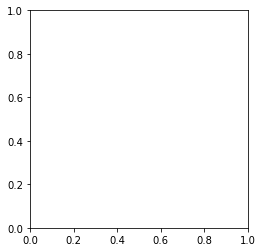

In [7]:
plt.pie([df.is_genuine.value_counts()],labels=df.is_genuine.unique(),autopct="%1.0f%%")
plt.title("La proportion des billets par nature")
plt.tight_layout()
plt.savefig("La proportion des billets par nature.jpg",bbox="tight",pad_inches=2,transparent=True)

C:\Users\BOULANGER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-10-e47abd0b3ba5>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Histogramme de la variable 'diagonal'.jpg",bbox="tight",pad_inches=2,transparent=True)


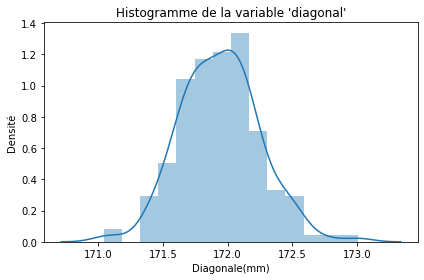

In [10]:
plt.figure()
sns.distplot(df['diagonal'])
plt.title("Histogramme de la variable 'diagonal'")
plt.xlabel('Diagonale(mm)')
plt.ylabel('Densité')
plt.tight_layout()
plt.savefig("Histogramme de la variable 'diagonal'.jpg",bbox="tight",pad_inches=2,transparent=True)

C:\Users\BOULANGER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-11-f4053f34bbd9>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Histogramme de la variable 'height_left'.jpg",bbox="tight",pad_inches=2,transparent=True)


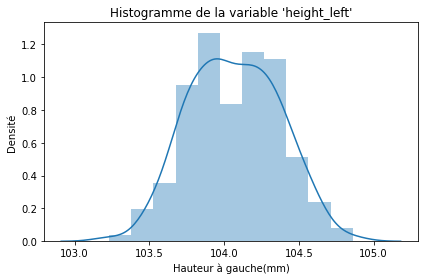

In [11]:
plt.figure()
sns.distplot(df['height_left'])
plt.title("Histogramme de la variable 'height_left'")
plt.xlabel('Hauteur à gauche(mm)')
plt.ylabel('Densité')
plt.tight_layout()
plt.savefig("Histogramme de la variable 'height_left'.jpg",bbox="tight",pad_inches=2,transparent=True)

C:\Users\BOULANGER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-12-11efd6a34903>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Histogramme de la variable 'height_right'.jpg",bbox="tight",pad_inches=2,transparent=True)


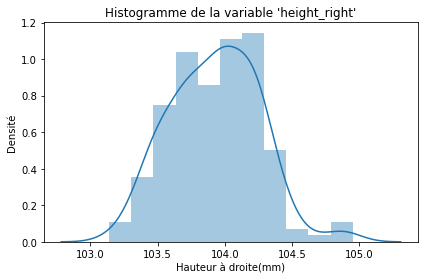

In [12]:
plt.figure()
sns.distplot(df['height_right'])
plt.title("Histogramme de la variable 'height_right'")
plt.xlabel('Hauteur à droite(mm)')
plt.ylabel('Densité')
plt.tight_layout()
plt.savefig("Histogramme de la variable 'height_right'.jpg",bbox="tight",pad_inches=2,transparent=True)

C:\Users\BOULANGER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-13-4f4d163c1160>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Histogramme de la variable 'margin_low'.jpg",bbox="tight",pad_inches=2,transparent=True)


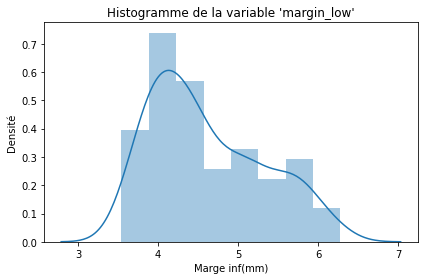

In [13]:
plt.figure()
sns.distplot(df['margin_low'])
plt.title("Histogramme de la variable 'margin_low'")
plt.xlabel('Marge inf(mm)')
plt.ylabel('Densité')
plt.tight_layout()
plt.savefig("Histogramme de la variable 'margin_low'.jpg",bbox="tight",pad_inches=2,transparent=True)

C:\Users\BOULANGER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-14-2a52011e075b>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Histogramme de la variable 'margin_up'.jpg",bbox="tight",pad_inches=2,transparent=True)


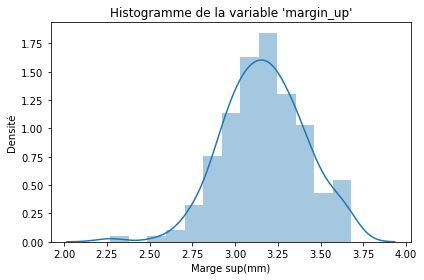

In [14]:
plt.figure()
sns.distplot(df['margin_up'])
plt.title("Histogramme de la variable 'margin_up'")
plt.xlabel('Marge sup(mm)')
plt.ylabel('Densité')
plt.tight_layout()
plt.savefig("Histogramme de la variable 'margin_up'.jpg",bbox="tight",pad_inches=2,transparent=True)

C:\Users\BOULANGER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-15-615c247e1ad4>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Histogramme de la variable 'length'.jpg",bbox="tight",pad_inches=2,transparent=True)


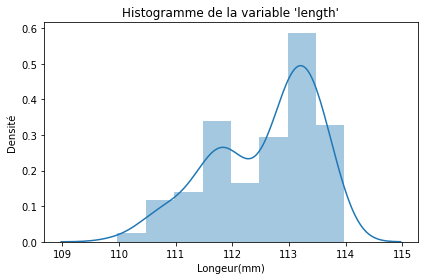

In [15]:
plt.figure()
sns.distplot(df['length'])
plt.title("Histogramme de la variable 'length'")
plt.xlabel('Longeur(mm)')
plt.ylabel('Densité')
plt.tight_layout()
plt.savefig("Histogramme de la variable 'length'.jpg",bbox="tight",pad_inches=2,transparent=True)

### Analyse bivariée 

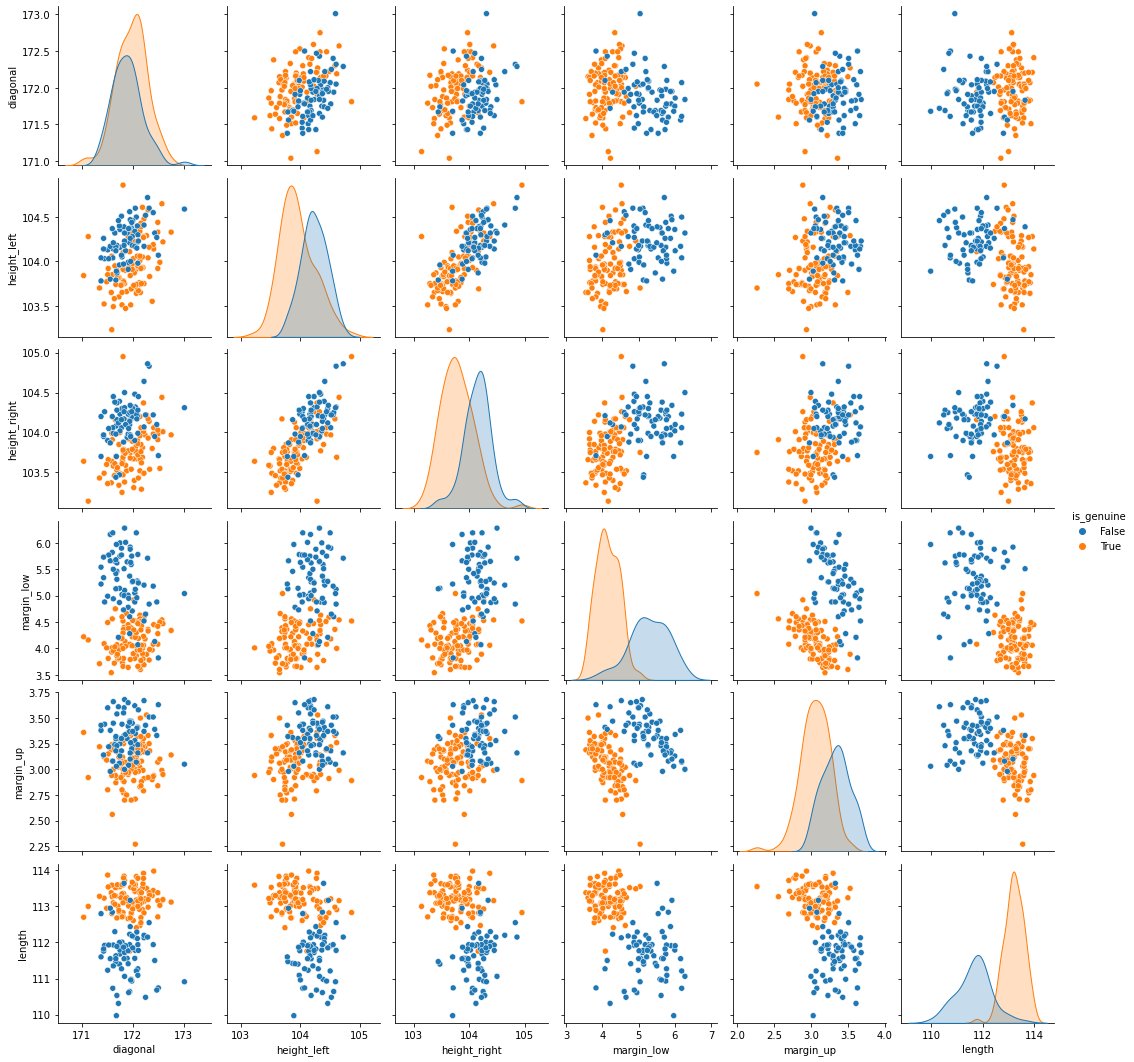

In [16]:
sns.pairplot(df,hue="is_genuine")
plt.savefig("graphiques par paire selon la nature des billets.png",dpi=80, format='png', bbox_inches="tight")

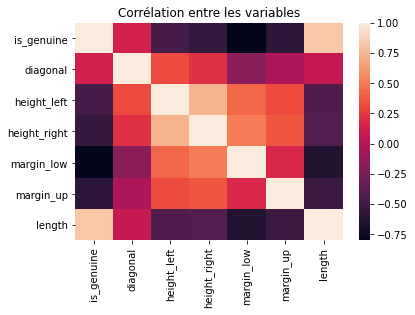

In [17]:
sns.heatmap(df.corr())
plt.title("Corrélation entre les variables")
plt.savefig("heatmap.png",dpi=80, format='png', bbox_inches="tight")

## Analyse en composantes principales 

### Eboulis des valeurs propres

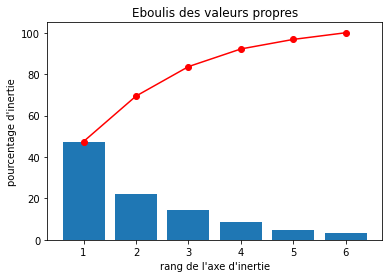

<Figure size 432x288 with 0 Axes>

In [18]:
# préparation des données
data=df[["diagonal","height_left","height_right","margin_low","margin_up","length" ]]
X=data.values
names= pd.array(df.index)
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
# choix du nombre de composantes à calculer
n_comp =6# min(6,169)
features = data.columns
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)
# Eboulis des valeurs propres
display_scree_plot(pca)
#sauvgarder
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Ebouli des valeurs propres.png",dpi=80, format='png', bbox_inches="tight")

#47.4 % de l’inertie totale sont associés à F1, et 22 % à F2, alors le premier plan factoriel représente 69.4 % de l’inertie totale.  

### Cercle des corrélations 

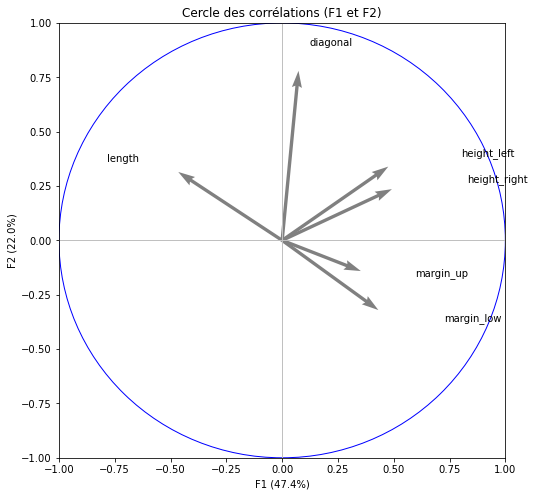

In [19]:
p=6
n=170
#valeur corrigée
eigval = (n-1)/n*pca.explained_variance_
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(data.columns[j],(corvar[j,0],corvar[j,1]))
 #ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#le titre
plt.title("Cercle des corrélations (F{} et F{})".format(0+1, 1+1))
# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(0+1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(1+1, round(100*pca.explained_variance_ratio_[1],1)))
# affichage des flèches
pcs = pca.components_
plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
pcs[0,:], pcs[1,:], 
angles='xy', scale_units='xy', scale=1,color="grey")
#sauvgarder
plt.savefig("cerle.png",dpi=80, format='png', bbox_inches="tight")

### Projection des individus

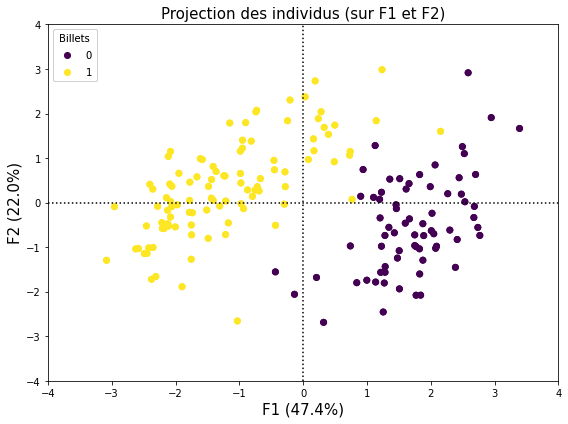

In [20]:
X_projected = pca.transform(X_scaled)
x1=X_projected[:,0]
x2=X_projected[:,1]
y=df.is_genuine
fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
plt.xlim(-4,4)
plt.ylim(-4,4)
ax.set_title ('Projection des individus (sur F1 et F2)', fontsize = 15)
ax.set_yticks([-4,-3,-2,-1,0, 1, 2,3,4])
plt.scatter(x1,x2,
           c=y,alpha=0.95,edgecolor='face',cmap=plt.cm.get_cmap('viridis',5))
scatter = ax.scatter(x1,x2, c=y)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Billets")
ax.add_artist(legend1)
plt.axvline(x= 0, color='k',linestyle=':')
plt.axhline(y=0, color='k',linestyle=':')
# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(0+1, round(100*pca.explained_variance_ratio_[0],1)), fontsize = 15)
plt.ylabel('F{} ({}%)'.format(1+1, round(100*pca.explained_variance_ratio_[1],1)), fontsize = 15)
plt.savefig("acp.png",dpi=80, format='png', bbox_inches="tight")

### Contribution des individus dans l'inertie totale

In [21]:
#calculer les carrés des distances à l’origine des individus
di = np.sum(X_scaled**2,axis=1)
contr=pd.DataFrame({'Billet':df.index,'d_i':di,'is_genuine':df.is_genuine})
contr=contr.sort_values('d_i',ascending=False)
contr
# les billets n° 166, 0 et 4 se démarquent le plus des autres

Billet        d_i  is_genuine
166     166  20.625650       False
0         0  18.410598        True
4         4  18.039567        True
122     122  16.790944       False
39       39  15.052608        True
..      ...        ...         ...
59       59   1.484454        True
76       76   1.435202        True
85       85   1.431664        True
98       98   0.878319        True
64       64   0.813929        True

[170 rows x 3 columns]

### Qualité de représentation des individus - COS2

In [22]:
cos2 = X_projected**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
qual=pd.DataFrame({'Billet':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
qual['COS2']=qual['COS2_1']+qual['COS2_2']
qual1=qual[qual['COS2_1']>0.5]
qual1=qual1.sort_values('COS2_1',ascending=False)
qual1

Billet    COS2_1    COS2_2      COS2
143     143  0.973456  0.007584  0.981040
46       46  0.962296  0.003343  0.965639
101     101  0.908310  0.037607  0.945917
94       94  0.906118  0.045729  0.951847
123     123  0.904783  0.047258  0.952041
..      ...       ...       ...       ...
17       17  0.514626  0.061992  0.576617
155     155  0.512833  0.032674  0.545507
98       98  0.512439  0.329905  0.842344
62       62  0.508210  0.190037  0.698247
8         8  0.505695  0.008692  0.514386

[88 rows x 4 columns]

In [23]:
qual2=qual[qual['COS2_2']>0.5]
qual2=qual2.sort_values('COS2_2',ascending=False)
qual2

Billet    COS2_1    COS2_2      COS2
21       21  0.000164  0.935643  0.935807
156     156  0.013014  0.919036  0.932050
33       33  0.017244  0.911419  0.928663
34       34  0.004225  0.890595  0.894820
23       23  0.006820  0.850794  0.857614
36       36  0.110271  0.833974  0.944245
53       53  0.013805  0.775037  0.788843
5         5  0.132447  0.771985  0.904432
26       26  0.089474  0.722621  0.812095
22       22  0.026330  0.692767  0.719097
130     130  0.148647  0.681582  0.830229
152     152  0.002987  0.681421  0.684408
70       70  0.096228  0.638835  0.735063
157     157  0.246527  0.608018  0.854545
91       91  0.210993  0.607136  0.818129
84       84  0.230132  0.592615  0.822748
65       65  0.244766  0.591937  0.836703
25       25  0.009160  0.576283  0.585443
141     141  0.008766  0.567736  0.576502
51       51  0.037081  0.554683  0.591765
38       38  0.137203  0.542855  0.680058
83       83  0.126488  0.541731  0.668219
95       95  0.209862  0.506538  0.716400
164     164  0.249536  0.502961  0.752497
131     131  0.363368  0.501595  0.864963

In [24]:
qual3=qual[qual['COS2']>0.5]
qual3=qual3.sort_values('COS2',ascending=False)
qual3

Billet    COS2_1    COS2_2      COS2
148     148  0.578193  0.410807  0.989001
143     143  0.973456  0.007584  0.981040
46       46  0.962296  0.003343  0.965639
45       45  0.631308  0.331305  0.962613
154     154  0.542732  0.417831  0.960564
..      ...       ...       ...       ...
159     159  0.468434  0.055178  0.523612
56       56  0.164819  0.357979  0.522798
8         8  0.505695  0.008692  0.514386
24       24  0.414556  0.098425  0.512981
108     108  0.468261  0.039054  0.507315

[133 rows x 4 columns]

## Algorithme K_means

### identification du nombre de groupe 1..10

C:\Users\BOULANGER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


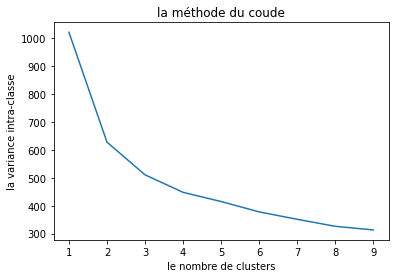

In [25]:
# Calcule l'enertie interaclasse (pour voir si on rajoute une classe ça baisse significativement ou pas) )
inertia=[]
k_range=range(1,10)
for k in k_range:
    model=KMeans(n_clusters=k).fit(X_scaled)
    inertia.append(model.inertia_)
plt.plot(k_range,inertia)  
plt.xlabel('le nombre de clusters')
plt.ylabel('la variance intra-classe')
plt.title('la méthode du coude')

plt.savefig("la méthode du coude.png",dpi=80, format='png', bbox_inches="tight")

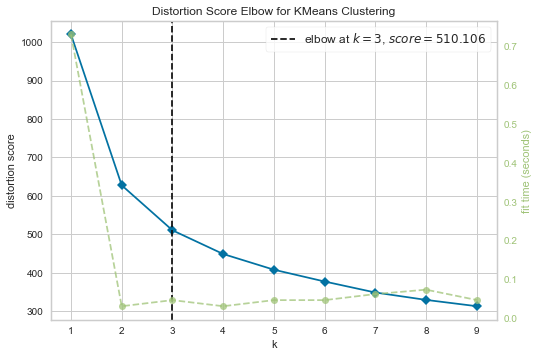

<Figure size 576x396 with 0 Axes>

In [49]:
from yellowbrick.cluster import KElbowVisualizer
coude=KElbowVisualizer(km,k=(1,10),metric='distortion',timing=True)
coude.fit(X_scaled)
coude.show()
plt.tight_layout()
plt.savefig("la méthode du coude2.png",dpi=80, format='png', bbox_inches="tight")

In [28]:
# Nombre de clusters 
n_clust = 3
# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)
# Récupération des clusters attribués à chaque individu
clusters = km.labels_
clusters

array([1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

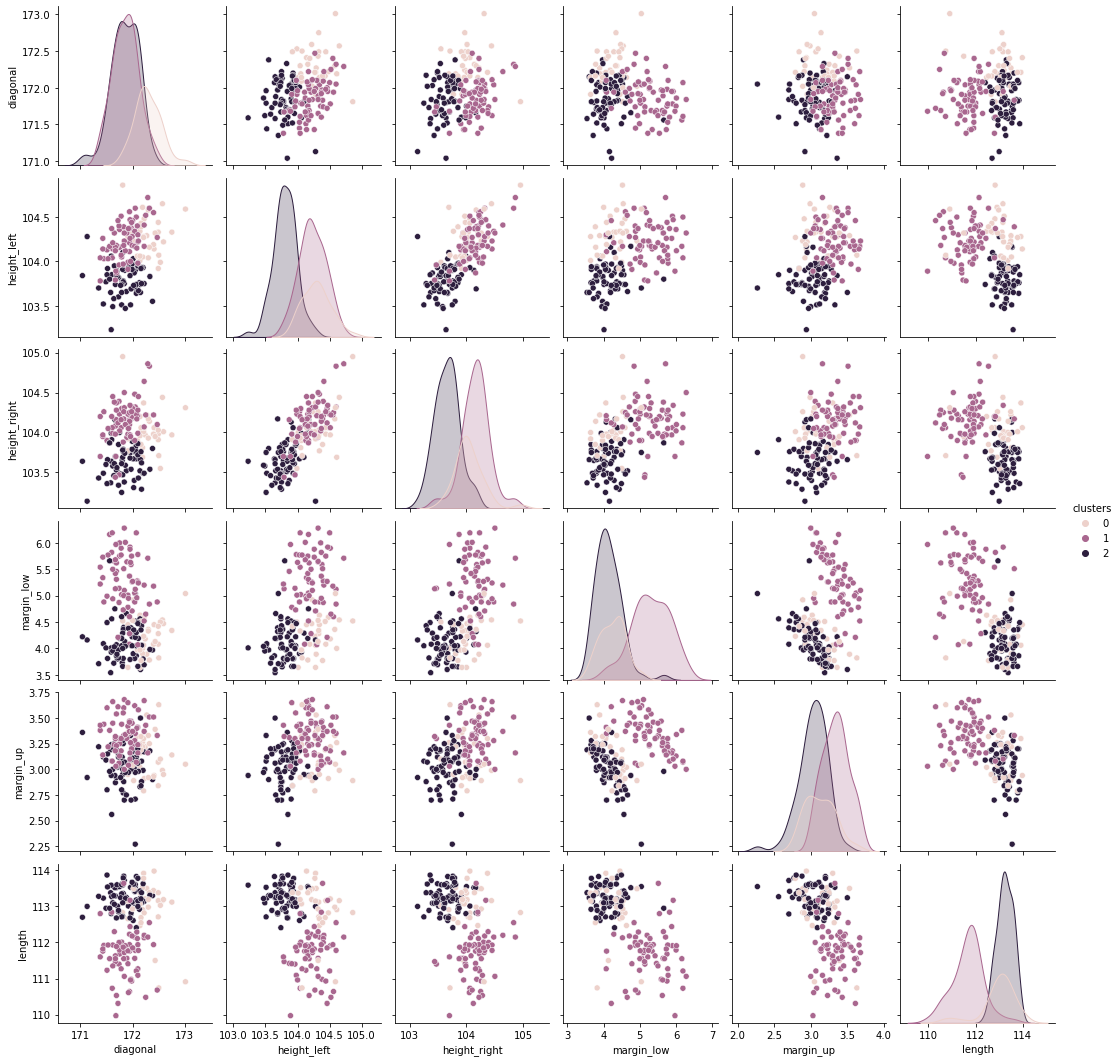

In [27]:
#ajouter la variable au data frame initial
B=data.copy()
B['clusters']=clusters
#configuration des points dans le plan
#des variables prises par paire
sns.pairplot(B,hue="clusters")
plt.savefig("graphiques par paire selon la nature des billets (kmeans) .png",dpi=80, format='png', bbox_inches="tight")


###  Affichage du clustering par projection des individus sur le premier plan factoriel

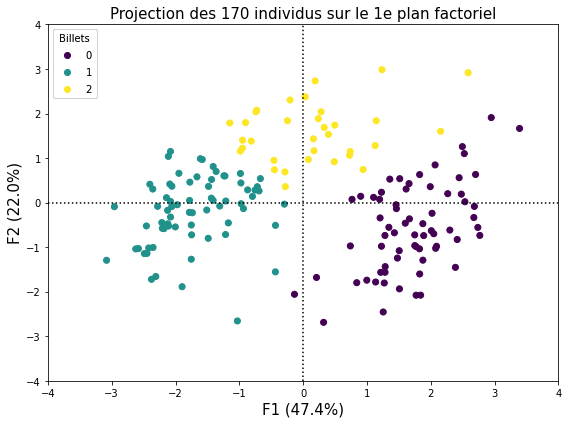

In [98]:
ax.set_yticks([-4,-3,-2,-1,0, 1, 2,3,4])
fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.scatter(x1, x2, c=clusters.astype(np.float), alpha=0.2,edgecolor='face', cmap=plt.cm.get_cmap('viridis',5))
scatter = ax.scatter(x1,x2,c=clusters.astype(np.float))
legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="Billets")
ax.add_artist(legend1)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]), fontsize = 15)

plt.axvline(x= 0, color='k',linestyle=':')
plt.axhline(y=0, color='k',linestyle=':')
# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(0+1, round(100*pca.explained_variance_ratio_[0],1)), fontsize = 15)
plt.ylabel('F{} ({}%)'.format(1+1, round(100*pca.explained_variance_ratio_[1],1)), fontsize = 15)
plt.savefig("k_means.png",dpi=80, format='png', bbox_inches="tight")

## Algorithme KNN

### Division de données 

In [481]:
X=df.drop('is_genuine',axis=1)
y=df['is_genuine']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
df_test=pd.merge(y_test,X_test, left_index = True, right_index = True,how='inner')
df_train=pd.merge(y_train,X_train, left_index = True, right_index = True,how='inner')

In [482]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


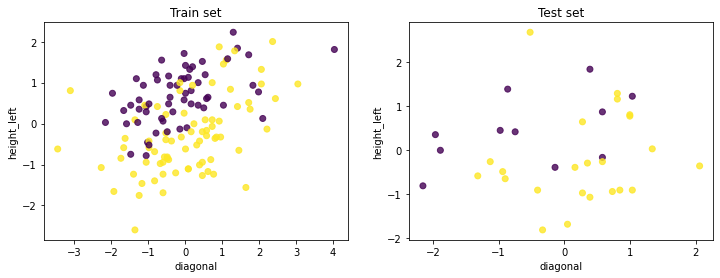

In [483]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, alpha=0.8)
plt.title('Train set')
plt.xlabel('diagonal')
plt.ylabel('height_left')
plt.subplot(122)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test, alpha=0.8)
plt.title('Test set')
plt.xlabel('diagonal')
plt.ylabel('height_left')
plt.savefig("nuage de point montre train_set et test_set.png",dpi=80, format='png', bbox_inches="tight")

In [484]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

### Evaluation de la performance du modèle 

In [485]:
print ("Accuracy_KNN_test:",model.score(X_test, y_test)*100,"%")
print ("Accuracy_KNN_entrainement:",model.score(X_train, y_train)*100,"%")

Accuracy_KNN_test: 94.11764705882352 %
Accuracy_KNN_entrainement: 100.0 %


In [486]:
print(pd.crosstab(y_test,model.predict(X_test)))

col_0       False  True 
is_genuine              
False          10      1
True            1     22


In [487]:
def detecter_KNN(diagonal,height_left,height_right,margin_low,margin_up,length):
    x=np.array([diagonal,height_left,height_right,margin_low,margin_up,length]).reshape(1,6)
    print("le billet est:",model.predict(x))

In [488]:
detecter_KNN(170,104,104.12,4,2,112)

le billet est: [ True]


## Régression logistique

In [489]:
reg_log1 = smf.glm('is_genuine ~margin_low+length', data=df_train, family=sm.families.Binomial()).fit()
print(reg_log1.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  136
Model:                                                   GLM   Df Residuals:                      133
Model Family:                                       Binomial   Df Model:                            2
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                    nan
Date:                                       Tue, 29 Jun 2021   Deviance:                          nan
Time:                                               12:44:20   Pearson chi2:                     9.00
No. Iterations:                                          100                                         
Covariance Type:                                   nonrobust                      

C:\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:946: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
C:\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:945: RuntimeWarning: invalid value encountered in add
  return (special.gammaln(n + 1) - special.gammaln(y + 1) -


In [490]:
X=df_test.drop('is_genuine',axis=1)
df_test['proba']=reg_log1.predict(X)
df_test['predict'] = df_test['proba'].map(lambda x: False if x>0.5 else True )


### Evaluation de la performance du modèle 

In [491]:
#on peut en déduire la matrice de confusion
pred=df_test['predict']
print(pd.crosstab(y_test,pred))

predict     False  True 
is_genuine              
False          11      0
True            0     23


In [492]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)
print ("Accuracy_reg_test:",acc*100,"%")

Accuracy_reg_test: 100.0 %


In [493]:
X=df_train.drop('is_genuine',axis=1)
df_train['proba']=reg_log1.predict(X)
df_train['predict'] = df_train['proba'].map(lambda x: False if x>0.5 else True )


In [494]:
#on peut en déduire la matrice de confusion
pred=df_train['predict']
print(pd.crosstab(y_train,pred))

predict     False  True 
is_genuine              
False          58      1
True            1     76


In [510]:
acc=accuracy_score(y_train,pred)
print ("Accuracy_reg_entrainement:",acc*100,"%")

Accuracy_reg_entrainement: 98.52941176470588 %


In [511]:
def detecteur_billet(diagonal,height_left,height_right,margin_low,margin_up,length):
    x=pd.DataFrame({'diagonal':diagonal,'height_left':height_left,'height_right':height_right,'margin_low':margin_low,'margin_up':margin_up,'length':length},index=[0])
    p=reg_log1.predict(x)
    p=p.to_numpy()
    if p>=.5:
        return print("le billet est Faux avec une probabilité de",p)

    else:
        return print("le billet est un vrai avec une probabilité de",1-p)

In [512]:
detecteur_billet(170,104,104.12,4,2,112)

le billet est un vrai avec une probabilité de [0.96657679]


In [513]:
detecteur_billet(172.09,103.95,103.73,4.39,3.09,113.19)

le billet est un vrai avec une probabilité de [0.99971188]


In [514]:
detecteur_billet(171.52,104.17,104.03,5.27,3.13,111.82)

le billet est Faux avec une probabilité de [0.99999906]


In [515]:
detecteur_billet(171.78,103.8,103.75,3.81,3.24,113.39)

le billet est un vrai avec une probabilité de [0.99999996]
